# Assignment 4

### <span style="color:chocolate"> Submission requirements </span>

Your work will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:

    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from keras.datasets import fashion_mnist

tf.get_logger().setLevel('INFO')

2025-02-09 23:29:46.013731: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


---
### Step 1: Data ingestion

You'll train a binary classifier using the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. This consists of 70,000 grayscale images (28x28). Each image is associated with 1 of 10 classes. The dataset was split by the creators; there are 60,000 training images and 10,000 test images. Note also that Tensorflow includes a growing [library of datasets](https://www.tensorflow.org/datasets/catalog/overview) and makes it easy to load them in numpy arrays.

In [2]:
# Load the Fashion MNIST dataset.
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

---
### Step 2: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) and Data Preprocessing are often iterative processes that involve going back and forth to refine and improve the quality of data analysis and preparation. However, the specific order can vary depending on the project's requirements. In some cases, starting with EDA, as you see in this assignment, could be more useful, but there is no rigid rule dictating the sequence in all situations.

### <span style="color:chocolate">Exercise 1:</span> Getting to know your data (5 points)

Complete the following tasks:

1. Print the shapes and types of (X_train, Y_train) and (X_test, Y_test). Interpret the shapes (i.e., what do the numbers represent?). Hint: For types use the <span style="color:chocolate">type()</span> function.
2. Define a list of strings of class names corresponding to each class in (Y_train, Y_test). Call this list label_names. Hint: Refer to the Fashion MNIST documentation.

In [3]:
# YOUR CODE HERE
# Printing shapes and types for (X_train, Y_train) and (X_test, Y_test)
print(f"X_train shape: {X_train.shape}, Type: {type(X_train)}")
print(f"Y_train shape: {Y_train.shape}, Type: {type(Y_train)}")
print(f"X_test shape: {X_test.shape}, Type: {type(X_test)}")
print(f"Y_test shape: {Y_test.shape}, Type: {type(Y_test)}")
# List of class names corresponding to each class in Y_train, Y_test
label_names = [
    'T-shirt/top',   # 0
    'Trouser',       # 1
    'Pullover',      # 2
    'Dress',         # 3
    'Coat',          # 4
    'Sandal',        # 5
    'Shirt',         # 6
    'Sneaker',       # 7
    'Bag',           # 8
    'Ankle boot'     # 9
]

# Print the label names
print("Class labels for Fashion MNIST:")
print(label_names)


X_train shape: (60000, 28, 28), Type: <class 'numpy.ndarray'>
Y_train shape: (60000,), Type: <class 'numpy.ndarray'>
X_test shape: (10000, 28, 28), Type: <class 'numpy.ndarray'>
Y_test shape: (10000,), Type: <class 'numpy.ndarray'>
Class labels for Fashion MNIST:
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### <span style="color:chocolate">Exercise 2:</span> Getting to know your data - cont'd (5 points)

Fashion MNIST images have one of 10 possible labels (shown above). 

Complete the following tasks:

1. Display the first 5 images in X_train for each class in Y_train, arranged in a 10x5 grid. Use the label_names list defined above;
2. Determine the minimum and maximum pixel values for images in the X_train dataset.

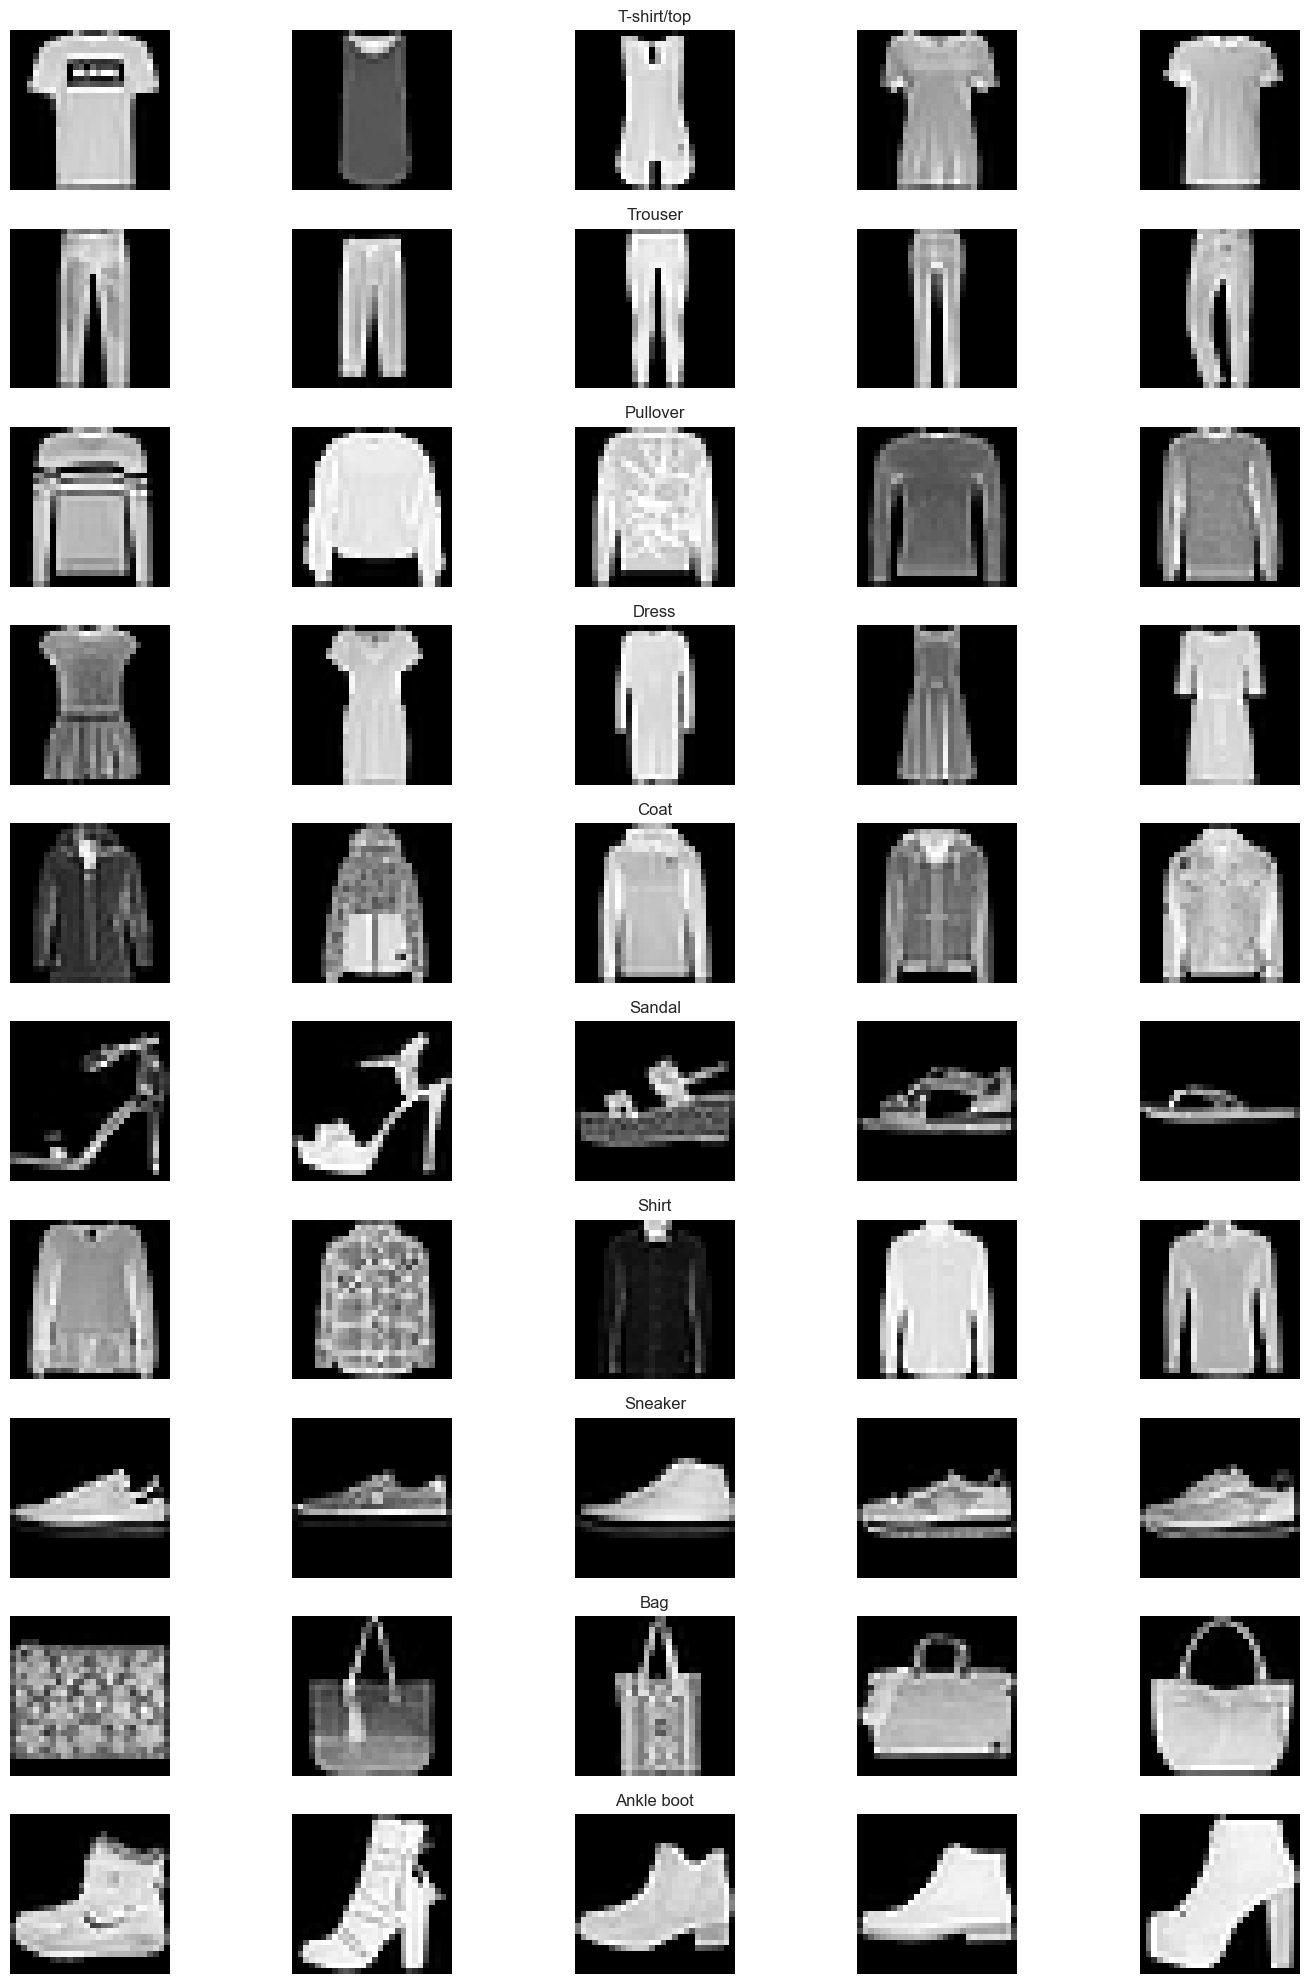

Minimum pixel value in X_train: 0
Maximum pixel value in X_train: 255


In [4]:
# YOUR CODE HERE
# Plot the first 5 images from each class (10 classes) in a 10x5 grid
plt.figure(figsize=(15, 20))

# Loop through all classes (10 classes in total)
for i in range(10):
    # Get the indices of the images belonging to the current class (i)
    class_indices = np.where(Y_train == i)[0][:5]
    
    # Plot the images
    for j, idx in enumerate(class_indices):
        plt.subplot(10, 5, i * 5 + j + 1)  # 10x5 grid
        plt.imshow(X_train[idx].reshape(28, 28), cmap='gray')  # Reshape and plot in grayscale
        plt.axis('off')  # Remove axes
        if j == 2:  # Display the class name above the middle image
            plt.title(label_names[i], fontsize=12)

plt.tight_layout()
plt.show()

# Determine the minimum and maximum pixel values in the X_train dataset
min_pixel_value = np.min(X_train)
max_pixel_value = np.max(X_train)

print(f"Minimum pixel value in X_train: {min_pixel_value}")
print(f"Maximum pixel value in X_train: {max_pixel_value}")


---
### Step 3: Data preprocessing

This step is essential for preparing this image data in a format that is suitable for ML algorithms. 

### <span style="color:chocolate">Exercise 3:</span> Feature preprocessing (5 points)

In the previous lab, the input data had just a few features. Here, we treat **every pixel value as a separate feature**, so each input example has 28x28 (784) features!

In this exercise, you'll perform the following tasks:

1. Normalize the pixel values in both X_train and X_test data so they range between 0 and 1;
2. For each image in X_train and X_test, flatten the 2-D 28x28 pixel array to a 1-D array of size 784. Hint: use the <span style="color:chocolate">reshape()</span> method available in NumPy. Note that by doing so you will overwrite the original arrays;
3. Pint the shape of X_train and X_test arrays.

In [5]:
# YOUR CODE HERE
# 1. Normalize the pixel values to range between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# 2. Flatten the 28x28 images into 1D arrays of size 784 using numpy.reshape()
X_train = np.reshape(X_train, (X_train.shape[0], 28 * 28))  # Flatten each 28x28 image into a 1D array of size 784
X_test = np.reshape(X_test, (X_test.shape[0], 28 * 28))  # Flatten test data similarly

# 3. Print the shapes of X_train and X_test
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (60000, 784)
Shape of X_test: (10000, 784)


### <span style="color:chocolate">Exercise 4:</span> Label preprocessing (5 points)

This assignment involves binary classification. Specifically, the objective is to predict whether an image belongs to the sneaker class (class 7) or not.

Therefore, write code so that for each example in (Y_train, Y_test), the outcome variable is represented as follows: 
* $y=1$, for sneaker class (positive examples), and
* $y=0$, for non-sneaker class (negative examples).

Note: To avoid "ValueError: assignment destination is read-only", first create a copy of the (Y_train, Y_test) data and call the resulting arrays (Y_train, Y_test). Then overwrite the (Y_train, Y_test) arrays to create binary outcomes.

In [6]:
# Make copies of the original dataset for binary classification task.
Y_train = np.copy(Y_train)
Y_test = np.copy(Y_test)

# YOUR CODE HERE
#Convert labels into binary: 1 for sneaker (class 7), 0 for non-sneaker (all other classes)
Y_train = np.where(Y_train == 7, 1, 0)  # For Y_train, 1 for sneaker (class 7), 0 for others
Y_test = np.where(Y_test == 7, 1, 0)  # For Y_test, 1 for sneaker (class 7), 0 for others

# Print the unique values in Y_train and Y_test to verify
print(f"Unique values in Y_train: {np.unique(Y_train)}")
print(f"Unique values in Y_test: {np.unique(Y_test)}")

Unique values in Y_train: [0 1]
Unique values in Y_test: [0 1]


### <span style="color:chocolate">Exercise 5:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Retain 20% from the training data for validation purposes. Set random state to 1234. All the other arguments of the method are set to default values. Name the resulting dataframes as follows: X_train_mini, X_val, Y_train_mini, Y_val.
2. Print the shape of each array.

In [7]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

# Split the training data into mini training set and validation set (20% for validation)
X_train_mini, X_val, Y_train_mini, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1234)

# Print the shapes of the resulting arrays
print(f"Shape of X_train_mini: {X_train_mini.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of Y_train_mini: {Y_train_mini.shape}")
print(f"Shape of Y_val: {Y_val.shape}")

Shape of X_train_mini: (48000, 784)
Shape of X_val: (12000, 784)
Shape of Y_train_mini: (48000,)
Shape of Y_val: (12000,)


### <span style="color:chocolate">Exercise 6:</span> Data shuffling (10 points)

Since you'll be using Batch Gradient Descent (BGD) for training, it is important that **each batch is a random sample of the data** so that the gradient computed is representative. 

1. Use integer array indexing to re-order (X_train_mini, Y_train_mini) using a list of shuffled indices. In doing so, you will overwrite the arrays.

In [8]:
np.random.seed(0)
# YOUR CODE HERE

# Generate shuffled indices for X_train_mini and Y_train_mini
shuffled_indices = np.random.permutation(X_train_mini.shape[0])

# Re-order X_train_mini and Y_train_mini using the shuffled indices
X_train_mini = X_train_mini[shuffled_indices]
Y_train_mini = Y_train_mini[shuffled_indices]

#print(X_train_mini[:5])
#print(Y_train_mini[:5])


---
### Step 4: Exploratory Data Analysis (EDA) - cont'd

Before delving into model training, let's further explore the raw feature values by comparing sneaker and non-sneaker training images.

### <span style="color:chocolate">Exercise 7:</span> Pixel distributions (10 points)

1. Identify all sneaker images in X_train_mini and calculate the mean pixel value for each sneaker image. Visualize these pixel values using a histogram. Print the mean pixel value across all sneaker images.
2. Identify all non-sneaker images in X_train_mini and calculate the mean pixel value for each non-sneaker image. Visualize these pixel values using a histogram. Print the mean pixel value across all non-sneaker images.
3. Based on the histogram results, assess whether there is any evidence suggesting that pixel values can be utilized to distinguish between sneaker and non-sneaker images. Justify your response.

Notes: Make sure to provide a descriptive title and axis labels for each histogran. Make sure you utilize Y_train_mini to locate the sneaker and non-sneaker class.

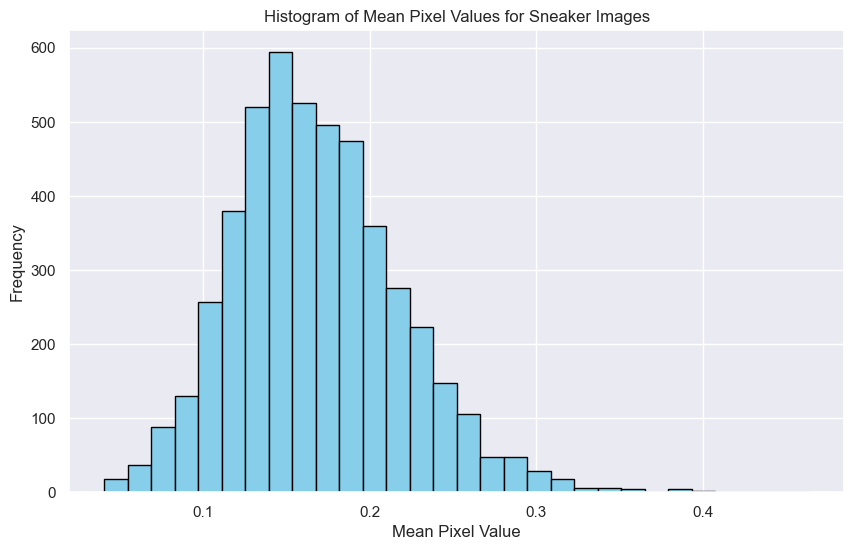

Mean pixel value across all sneaker images: 0.1682747275993731


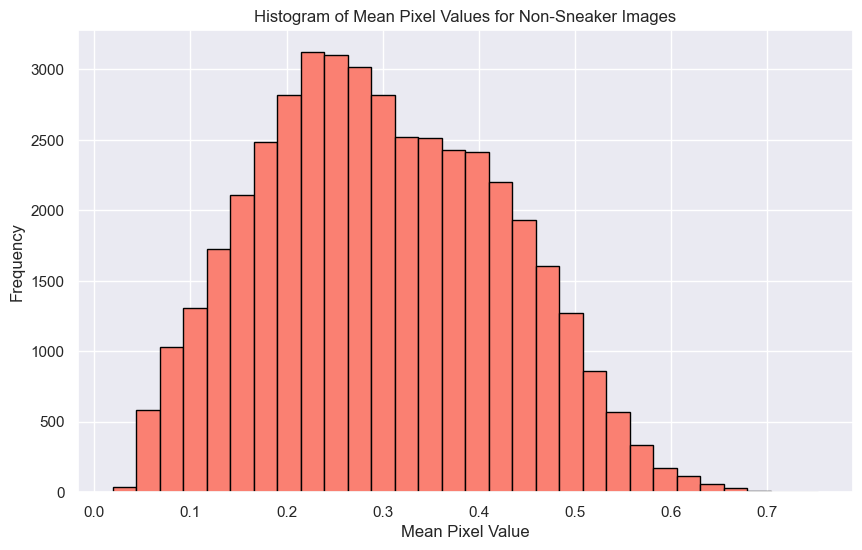

Mean pixel value across all non-sneaker images: 0.2990019268123916


In [9]:
# YOUR CODE HERE
# 1. Identify sneaker images and calculate the mean pixel value for each
sneaker_indices = np.where(Y_train_mini == 1)[0]
sneaker_images = X_train_mini[sneaker_indices]

# Calculate mean pixel value for each sneaker image
mean_pixel_sneaker = sneaker_images.mean(axis=1)

# Visualize the mean pixel values for sneaker images
plt.figure(figsize=(10, 6))
plt.hist(mean_pixel_sneaker, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Mean Pixel Values for Sneaker Images')
plt.xlabel('Mean Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print the overall mean pixel value across all sneaker images
print(f"Mean pixel value across all sneaker images: {mean_pixel_sneaker.mean()}")

# 2. Identify non-sneaker images and calculate the mean pixel value for each
non_sneaker_indices = np.where(Y_train_mini == 0)[0]
non_sneaker_images = X_train_mini[non_sneaker_indices]

# Calculate mean pixel value for each non-sneaker image
mean_pixel_non_sneaker = non_sneaker_images.mean(axis=1)

# Visualize the mean pixel values for non-sneaker images
plt.figure(figsize=(10, 6))
plt.hist(mean_pixel_non_sneaker, bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of Mean Pixel Values for Non-Sneaker Images')
plt.xlabel('Mean Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print the overall mean pixel value across all non-sneaker images
print(f"Mean pixel value across all non-sneaker images: {mean_pixel_non_sneaker.mean()}")


Analysis:
Given that the mean pixel values for sneaker and non-sneaker images are quite different (0.1683 vs 0.2990), The difference indicates a the sneaker images tend to be darker on average, while the non-sneaker images tend to be brighter.
This means pixel values can be a useful feature, but the distinction might not be sufficient on its own, and further features may help improve accuracy with the classification.

---
### Step 4: Modeling

### <span style="color:chocolate">Exercise 8:</span> Baseline model (10 points)

When dealing with classification problems, a simple baseline is to select the *majority* class (the most common label in the training set) and use it as the prediction for all inputs.

With this information in mind:

1. What is the number of sneaker images in Y_train_mini?
2. What is the number of non-sneaker images in Y_train_mini?
3. What is the majority class in Y_train_mini?
4. What is the accuracy of a majority class classifier for Y_train_mini?
5. Implement a function that computes the Log Loss (binary cross-entropy) metric and use it to evaluate this baseline on both the mini train (Y_train_mini) and validation (Y_val) data. Use 0.1 as the predicted probability for your baseline (reflecting what we know about the original distribution of classes in the mini training data). Hint: for additional help, see the file ``04 Logistic Regression with Tensorflow_helpers.ipynb``.

In [10]:
# YOUR CODE HERE
import numpy as np

# 1. Number of Sneaker Images
num_sneaker_images = np.sum(Y_train_mini == 1)
print(f"number of sneaker images in U_train_mini: {num_sneaker_images}")

# 2. Number of Non-Sneaker Images
num_non_sneaker_images = np.sum(Y_train_mini == 0)
print(f"number of non-sneaker images in U_train_mini: {num_non_sneaker_images}")

# 3. Majority Class
majority_class = 1 if num_sneaker_images > num_non_sneaker_images else 0
print(f"majority class in Y_train_mini: {majority_class}")

# 4. Accuracy of Majority Class Classifier
# Majority class classifier always predicts the majority class
majority_predictions = np.full(Y_train_mini.shape, majority_class)
accuracy_majority_classifier = np.mean(majority_predictions == Y_train_mini)
print(f"accuray of a majority class classifier for Y_train_mini: {accuracy_majority_classifier}")

# 5. Log Loss (Binary Cross-Entropy) Function
def compute_log_loss(y_true, y_pred_prob):
    epsilon = 1e-15  # To avoid log(0) errors
    y_pred_prob = np.clip(y_pred_prob, epsilon, 1 - epsilon)  # Ensure probabilities are within valid range
    log_loss = -np.mean(y_true * np.log(y_pred_prob) + (1 - y_true) * np.log(1 - y_pred_prob))
    return log_loss

# Predicted probabilities for baseline classifier
baseline_probability = 0.1  # Predicted probability for the sneaker class (1)
baseline_predictions_prob = np.full(Y_train_mini.shape, baseline_probability)

# Compute Log Loss on Training Data
train_log_loss = compute_log_loss(Y_train_mini, baseline_predictions_prob)

# Predicted probabilities for validation data
baseline_predictions_prob_val = np.full(Y_val.shape, baseline_probability)

# Compute Log Loss on Validation Data
val_log_loss = compute_log_loss(Y_val, baseline_predictions_prob_val)

# Print the results
print(f"Number of sneaker images in Y_train_mini: {num_sneaker_images}")
print(f"Number of non-sneaker images in Y_train_mini: {num_non_sneaker_images}")
print(f"Majority class in Y_train_mini: {majority_class}")
print(f"Accuracy of majority class classifier: {accuracy_majority_classifier:.4f}")
print(f"Log Loss on Training Data (baseline classifier): {train_log_loss:.4f}")
print(f"Log Loss on Validation Data (baseline classifier): {val_log_loss:.4f}")

number of sneaker images in U_train_mini: 4800
number of non-sneaker images in U_train_mini: 43200
majority class in Y_train_mini: 0
accuray of a majority class classifier for Y_train_mini: 0.9
Number of sneaker images in Y_train_mini: 4800
Number of non-sneaker images in Y_train_mini: 43200
Majority class in Y_train_mini: 0
Accuracy of majority class classifier: 0.9000
Log Loss on Training Data (baseline classifier): 0.3251
Log Loss on Validation Data (baseline classifier): 0.3251


### <span style="color:chocolate">Exercise 9:</span> Improvement over Baseline with TensorFlow (10 points)

Let's use TensorFlow to train a binary logistic regression model much like you did in the previous assignment. The goal here is to build a ML model to improve over the baseline classifier.

1. Fill in the <span style="color:green">NotImplemented</span> parts of the build_model() function below by following the instructions provided as comments. Hint: the activation function, the loss, and the evaluation metric are different compared to the linear regression model;
2. Build and compile a model using the build_model() function and the (X_train_mini, Y_train_mini) data. Set learning_rate = 0.0001. Call the resulting object *model_tf*.
3. Train *model_tf* using the (X_train_mini, Y_train_mini) data. Set num_epochs = 5 and batch_size=32. Pass the (X_val, Y_val) data for validation. Hint: see the documentation behind the [tf.keras.Model.fit()](https://www.tensorflow.org/api_docs/python/tf/keras/Model) method.
3. Generate a plot (for the mini training and validation data) with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title. Hint: check what the [tf.keras.Model.fit()](https://www.tensorflow.org/api_docs/python/tf/keras/Model) method returns.

In [11]:
def build_model(num_features, learning_rate):
  """Build a TF linear regression model using Keras.

  Args:
    num_features: The number of input features.
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  # This is not strictly necessary, but each time you build a model, TF adds
  # new nodes (rather than overwriting), so the colab session can end up
  # storing lots of copies of the graph when you only care about the most
  # recent. Also, as there is some randomness built into training with SGD,
  # setting a random seed ensures that results are the same on each identical
  # training run.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  # Build a model using keras.Sequential. While this is intended for neural
  # networks (which may have multiple layers), we want just a single layer for
  # binary logistic regression.
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units=1,        # output dim
      input_shape=(num_features,),  # input dim
      use_bias=True,               # use a bias (intercept) param
      activation='sigmoid',
      kernel_initializer=tf.ones_initializer(),  # initialize params to 1
      bias_initializer=tf.ones_initializer()    # initialize bias to 1
  ))

  # We need to choose an optimizer. We'll use SGD, which is actually mini-batch GD
  optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

  # Finally, compile the model. Select the accuracy metric. This finalizes the graph for training.
  model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',    # Binary Cross-Entropy Loss for binary classification
                  metrics=['accuracy'])          # Accuracy metric for eval
    
  return model

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1017 - loss: 208.5961 - val_accuracy: 0.1000 - val_loss: 199.9825
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1017 - loss: 196.0804 - val_accuracy: 0.1000 - val_loss: 187.4252
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1017 - loss: 183.5648 - val_accuracy: 0.1000 - val_loss: 174.8679
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1017 - loss: 171.0492 - val_accuracy: 0.1000 - val_loss: 162.3107
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1017 - loss: 158.5334 - val_accuracy: 0.1000 - val_loss: 149.7533


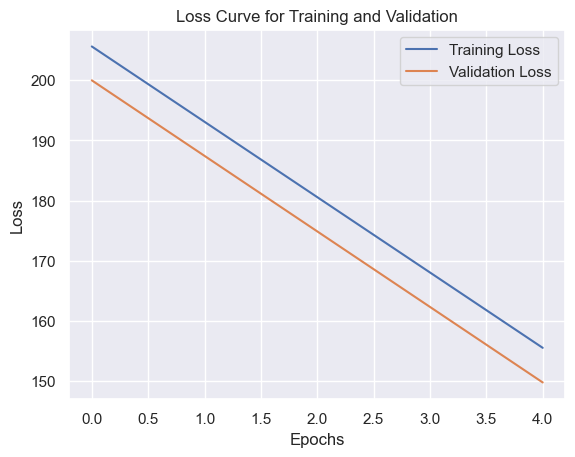

In [12]:
tf.random.set_seed(0)
# 2. Build and compile model
# YOUR CODE HERE
# Build the model
learning_rate = 0.0001
num_features = X_train_mini.shape[1]  # 784 after flattening
model_tf = build_model(num_features, learning_rate)

# 3. Fit the model
# YOUR CODE HERE
# Train the model
history = model_tf.fit(
    X_train_mini, Y_train_mini, 
    epochs=5, 
    batch_size=32, 
    validation_data=(X_val, Y_val)
)

# Plot the loss curves for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve for Training and Validation')
plt.legend()
plt.show()

---
### Step 5: Hyperparameter tuning

Hyperparameter tuning is a crucial step in optimizing ML models. It involves systematically adjusting hyperparameters such as learning rate, number of epochs, and optimizer to find the model configuration that leads to the best generalization performance.

This tuning process is typically conducted by monitoring the model's performance on the validation vs. training set. It's important to note that using the test set for hyperparameter tuning can compromise the integrity of the evaluation process by violating the assumption of "blindness" of the test data.

### <span style="color:chocolate">Exercise 10:</span> Hyperparameter tuning (10 points)

1. Fine-tune the **learning rate** and **number of epochs** hyperparameters of *model_tf* to determine the setup that yields the most optimal generalization performance. Feel free to explore various values for these hyperparameters. Hint: you can manually test different hyperparameter values or you can use the [Keras Tuner](https://www.tensorflow.org/tutorials/keras/keras_tuner). If you decide to work with the Keras Tuner, define a new model building function named <span style="color:chocolate">build_model_tuner()</span>.

After identifying your preferred model configuration, print the following information:

2. The first five learned parameters of the model (this should include the bias term);
3. The loss at the final epoch on both the mini training and validation datasets;
4. The percentage difference between the losses observed on the mini training and validation datasets.
5. Compare the training/validation loss of the TensorFlow model (model_tf) with the baseline model's loss. Does the TensorFlow model demonstrate an improvement over the baseline model?


Please note that we will consider 'optimal model configuration' any last-epoch training and validation loss that is below 0.08.

In [13]:
# YOUR CODE HERE
import keras_tuner as kt

def build_model_tuner(hp):
    """Build a TF binary logistic regression model using Keras Tuner.

    Args:
      hp: Hyperparameter object passed by Keras Tuner.

    Returns:
      model: A tf.keras model (graph).
    """
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

    model = tf.keras.Sequential()

    # Adding a Dense layer for binary logistic regression
    model.add(tf.keras.layers.Dense(
        units=1,                    # Output dimension (1 unit for binary output)
        input_shape=(784,),         # Input shape (784 features after flattening 28x28 images)
        use_bias=True,               # Use bias term (intercept)
        activation='sigmoid',        # Sigmoid activation function (output between 0 and 1)
        kernel_initializer=tf.ones_initializer(),  # Initialize weights to 1
        bias_initializer=tf.ones_initializer()     # Initialize bias to 1
    ))

    # Hyperparameter tuning for learning rate
    #learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, step=1e-5)
    learning_rate = hp.Float('learning_rate', min_value=0.09, max_value=0.2, step=0.03)
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',    # Binary Cross-Entropy Loss for binary classification
        metrics=['accuracy']          # Accuracy metric for evaluation
    )

    return model
# Define the Hyperparameter Search Space
tuner = kt.Hyperband(
    build_model_tuner,
    objective='val_loss',  # We want to minimize validation loss
    max_epochs=5,         # Maximum epochs to explore
    hyperband_iterations=1,  # Number of different learning rates
    directory='keras_tuner_dir',
    project_name='logistic_regression_tuning'
)

# Run the tuner to search for the optimal configuration
tuner.search(X_train_mini, Y_train_mini, validation_data=(X_val, Y_val), epochs=5, batch_size=32)


Trial 4 Complete [00h 00m 05s]
val_loss: 0.08056791871786118

Best val_loss So Far: 0.0594305656850338
Total elapsed time: 00h 00m 22s


In [14]:
# Retrieve the best model based on validation loss
best_model = tuner.get_best_models(num_models=1)[0]

# Print the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best learning rate: {best_hyperparameters['learning_rate']}")


Best learning rate: 0.18


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9802 - loss: 0.0600 - val_accuracy: 0.9786 - val_loss: 0.0537
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9817 - loss: 0.0547 - val_accuracy: 0.9797 - val_loss: 0.0513
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9823 - loss: 0.0523 - val_accuracy: 0.9799 - val_loss: 0.0499
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9827 - loss: 0.0509 - val_accuracy: 0.9800 - val_loss: 0.0491
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9829 - loss: 0.0499 - val_accuracy: 0.9806 - val_loss: 0.0486


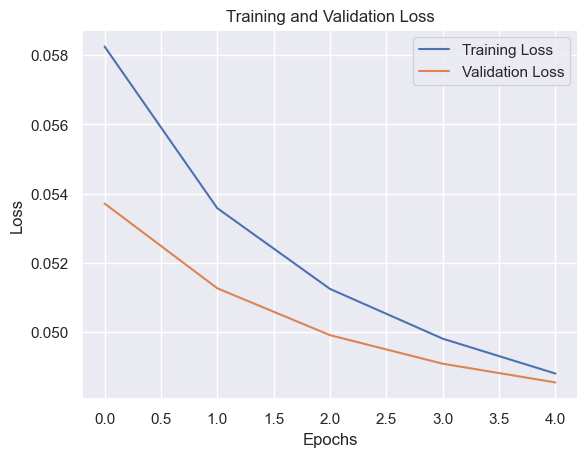

Final training loss: 0.04880693554878235
Final validation loss: 0.04855053871870041


In [15]:
# Train the best model
history = best_model.fit(
    X_train_mini, Y_train_mini,
    epochs=5,
    batch_size=32,
    validation_data=(X_val, Y_val)
)

# Plot the loss values over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Print the final loss values
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print(f"Final training loss: {train_loss}")
print(f"Final validation loss: {val_loss}")


In [16]:
# Get learned parameters (weights and biases) from the model
weights, bias = best_model.layers[0].get_weights()

# Print the first 5 learned parameters (weights + bias)
print(f"First 5 learned parameters (weights): {weights.flatten()[:5]}")
print(f"Learned bias: {bias[0]}")
# Calculate the percentage difference between the training and validation losses
percent_difference = 100 * abs(train_loss - val_loss) / min(train_loss, val_loss)
print(f"Percentage difference between training and validation loss: {percent_difference}%")

print(f"Comparison with baseline model:")
print(f"Baseline training loss: {train_log_loss}")
print(f"Baseline validation loss: {val_log_loss}")
print(f"Final training loss: {train_loss}")
print(f"Final validation loss: {val_loss}")


First 5 learned parameters (weights): [0.999707   0.9990302  0.98672557 0.97337383 0.9399282 ]
Learned bias: -2.1094441413879395
Percentage difference between training and validation loss: 0.5281029559064033%
Comparison with baseline model:
Baseline training loss: 0.3250829733914482
Baseline validation loss: 0.3250829733914482
Final training loss: 0.04880693554878235
Final validation loss: 0.04855053871870041


---
### Step 6: Evaluation and Generalization


Now that you've determined the optimal set of hyperparameters, it's time to evaluate your optimized model on the test data to gauge its performance in real-world scenarios, commonly known as inference.

### <span style="color:chocolate">Exercise 11:</span> Computing accuracy (10 points)

1. Calculate aggregate accuracy on both mini train and test datasets using a probability threshold of 0.5. Hint: You can utilize the <span style="color:chocolate">model.evaluate()</span> method provided by tf.keras. Note: Aggregate accuracy measures the overall correctness of the model across all classes in the dataset;

2. Does the model demonstrate strong aggregate generalization capabilities? Provide an explanation based on your accuracy observations.

In [17]:
# YOUR CODE HERE
# Evaluate the model on the mini training data (X_train_mini, Y_train_mini)
train_loss, train_accuracy = best_model.evaluate(X_train_mini, Y_train_mini, batch_size=32)
print(f"Training Loss: {train_loss}, Training Accuracy: {train_accuracy}")

# Evaluate the model on the validation data (X_val, Y_val)
val_loss, val_accuracy = best_model.evaluate(X_val, Y_val, batch_size=32)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# Evaluate the model on the test dataset
test_loss, test_accuracy = best_model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - accuracy: 0.9834 - loss: 0.0464
Training Loss: 0.04731440171599388, Training Accuracy: 0.9835000038146973
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.9809 - loss: 0.0461
Validation Loss: 0.04855053871870041, Validation Accuracy: 0.9805833101272583
Test Accuracy: 0.9813


Explanation: With test accuracy of 0.9813 means the model correctly predicted the label for 98.13%.
Yes the best model here does demonstrates strong aggregate capabilities.

### <span style="color:chocolate">Exercise 12:</span> Fairness evaluation (10 points)

1. Generate and visualize the confusion matrix on the test dataset using a probability threshold of 0.5. Additionally, print the True Positives (TP), False Negatives (FN), False Positives (FP), and True Negatives (TN). Hint: you can utilize the <span style="color:chocolate">model.predict()</span> method available in tf.keras, and then the <span style="color:chocolate">confusion_matrix()</span>, <span style="color:chocolate">ConfusionMatrixDisplay()</span> methods available in sklearn.metrics;

2. Compute subgroup accuracy, separately for the sneaker and non-sneaker classes, on the test dataset using a probability threshold of 0.5. Reflect on any observed accuracy differences (potential lack of fairness) between the two classes.

3. Does the model demonstrate strong subgroup generalization capabilities? Provide an explanation based on your accuracy observations.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step
True Negatives (TN): 8914
False Positives (FP): 86
False Negatives (FN): 101
True Positives (TP): 899


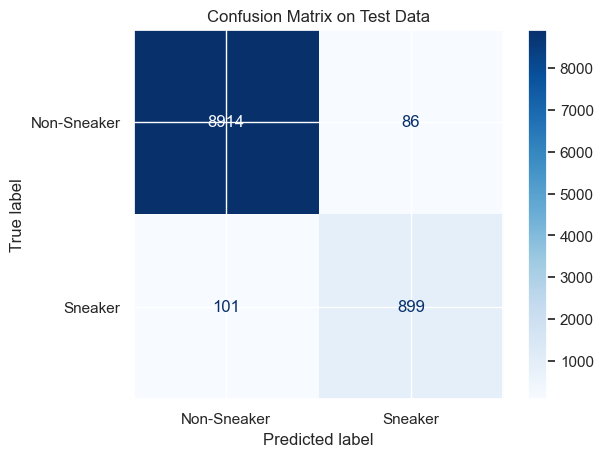

In [18]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Predict the probabilities for the test data
y_pred_probs = best_model.predict(X_test)

# Apply the threshold of 0.5 to get binary predictions
y_pred = (y_pred_probs >= 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Extract the individual values for easier understanding
TN, FP, FN, TP = cm.ravel()

# Print confusion matrix components
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Sneaker', 'Sneaker'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix on Test Data")
plt.show()


In [19]:
# Compute subgroup accuracy for sneaker (Y_test = 1) and non-sneaker (Y_test = 0)
sneaker_mask = (Y_test == 1)
non_sneaker_mask = (Y_test == 0)

# Accuracy for sneaker class
sneaker_accuracy = np.mean(y_pred[sneaker_mask] == Y_test[sneaker_mask])

# Accuracy for non-sneaker class
non_sneaker_accuracy = np.mean(y_pred[non_sneaker_mask] == Y_test[non_sneaker_mask])

# Print subgroup accuracies
print(f"Sneaker accuracy: {sneaker_accuracy:.4f}")
print(f"Non-Sneaker accuracy: {non_sneaker_accuracy:.4f}")


Sneaker accuracy: 0.8990
Non-Sneaker accuracy: 0.9904


This result shows a highly balanced model where it predicts image of sneaker with 89.90% accuracy and predicts non-sneaker images with 99.04% accuracy.

----
#### <span style="color:chocolate">Additional practice question</span> (not graded)

Is it possible to enhance the prediction accuracy for the sneaker class by performing the following steps?

1. Implement data balancing techniques, such as oversampling or undersampling, to equalize the representation of both classes.
2. After balancing the data, retrain the model on the balanced dataset.
3. Evaluate the model's performance, particularly focusing on the accuracy achieved for the sneaker class.